In [5]:
from scipy.stats import gaussian_kde, binned_statistic
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
filepath = ("/hdfs/local/sven/exoplanets/repo_test/")
_file    = open(filepath + ("like_fixedT10v100Tcut650_nocutTwn_N100_sigma0.2_f1.0gamma1.2rs20.0v42"), "rb") 
like1     = pickle.load(_file)
_file    = open(filepath + ("posterior_fixedT10v100Tcut650_nocutTwn_N100_sigma0.2_f1.0gamma1.2rs20.0v42"), "rb") 
samples1  = pickle.load(_file)


_file    = open(filepath + ("like_test_new_fixedT10v100Tcut650_nocutTwn_N100_sigma0.2_f1.0gamma1.2rs20.0v42"), "rb") 
like2     = pickle.load(_file)
_file    = open(filepath + ("posterior_test_new_fixedT10v100Tcut650_nocutTwn_N100_sigma0.2_f1.0gamma1.2rs20.0v42"), "rb") 
samples2  = pickle.load(_file)

Text(0, 0.5, '-ln($\\mathcal{L}$)')

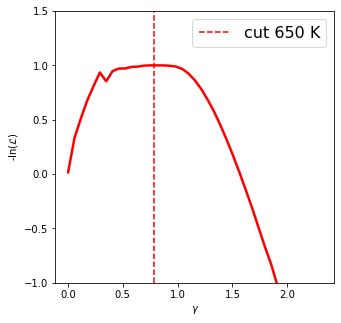

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.set_xlabel(r"$\gamma$")

bin_n=40
x = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n)[1] 
y = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="r", lw=2.5)
axes.axvline(samples1[:, 1][np.argmax(like1)], color="red", ls="--", label="before")

x = binned_statistic(samples2[:, 1], like2, 'max', bins=bin_n)[1] 
y = binned_statistic(samples2[:, 1], like2, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="orange", lw=2.5)
axes.axvline(samples2[:, 1][np.argmax(like2)], color="orange", ls="--", label="after")

axes.set_ylim(-1, 1.5)
axes.legend(fontsize=16)

axes.set_ylabel(r"-ln($\mathcal{L}$)")